# 1. Preprocessing

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns


generationPlant1 = pd.read_csv('Plant_1_Generation_Data.csv')
generationPlant2 = pd.read_csv('Plant_2_Generation_Data.csv')
weatherPlant1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
weatherPlant2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

generationPlant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [210]:
generationPlant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [211]:
weatherPlant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [212]:
weatherPlant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [213]:
#Turning "DATE_TIME" to int so merging is possible and dropping repeated or useless columns
weatherPlant1["DATE_TIME"] = (weatherPlant1["DATE_TIME"].str[:4] + weatherPlant1["DATE_TIME"].str[5:7] + weatherPlant1["DATE_TIME"].str[8:10] + weatherPlant1["DATE_TIME"].str[-8:-6] + weatherPlant1["DATE_TIME"].str[-5:-3]).astype('int64')
generationPlant1["DATE_TIME"] = (generationPlant1["DATE_TIME"].str[6:10] + generationPlant1["DATE_TIME"].str[3:5] + generationPlant1["DATE_TIME"].str[:2] + generationPlant1["DATE_TIME"].str[11:13] + generationPlant1["DATE_TIME"].str[-2:]).astype('int64')
weatherPlant1.drop("SOURCE_KEY", inplace=True, axis=1)
weatherPlant1.drop("PLANT_ID", inplace=True, axis=1)

weatherPlant2["DATE_TIME"] = (weatherPlant2["DATE_TIME"].str[:4] + weatherPlant2["DATE_TIME"].str[5:7] + weatherPlant2["DATE_TIME"].str[8:10] + weatherPlant2["DATE_TIME"].str[-8:-6] + weatherPlant2["DATE_TIME"].str[-5:-3]).astype('int64')
generationPlant2["DATE_TIME"] = (generationPlant2["DATE_TIME"].str[:4] + generationPlant2["DATE_TIME"].str[5:7] + generationPlant2["DATE_TIME"].str[8:10] + generationPlant2["DATE_TIME"].str[-8:-6] + generationPlant2["DATE_TIME"].str[-5:-3]).astype('int64')
weatherPlant2.drop("SOURCE_KEY", inplace=True, axis=1)
weatherPlant2.drop("PLANT_ID", inplace=True, axis=1)

#Changing source_key to ints
#Will merge plant keys and sourcekeys, therefore, the source keys form plant 1 will be "1XX" and the ones from plant 2 will be "2XX" (XX being the source key converted to an int value)
sourceKeys1 = generationPlant1["SOURCE_KEY"].unique()
dict1 = dict(zip(sourceKeys1, np.arange(100, 100 + len(sourceKeys1))))
generationPlant1["SOURCE_KEY"].replace(dict1, inplace=True)

sourceKeys2 = generationPlant2["SOURCE_KEY"].unique()
dict2 = dict(zip(sourceKeys2, np.arange(200, 200 + len(sourceKeys2))))
generationPlant2["SOURCE_KEY"].replace(dict2, inplace=True)

#Merging all datasets into one
generationPlant1 = generationPlant1.merge(weatherPlant1, how='left', on="DATE_TIME")
generationPlant2 = generationPlant2.merge(weatherPlant2, how='left', on='DATE_TIME')
dataset = pd.concat([generationPlant1, generationPlant2], ignore_index=True)
dataset.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,202005150000,4135001,100,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,202005150000,4135001,101,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,202005150000,4135001,102,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,202005150000,4135001,103,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,202005150000,4135001,104,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


In [214]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DATE_TIME            136476 non-null  int64  
 1   PLANT_ID             136476 non-null  int64  
 2   SOURCE_KEY           136476 non-null  int32  
 3   DC_POWER             136476 non-null  float64
 4   AC_POWER             136476 non-null  float64
 5   DAILY_YIELD          136476 non-null  float64
 6   TOTAL_YIELD          136476 non-null  float64
 7   AMBIENT_TEMPERATURE  136472 non-null  float64
 8   MODULE_TEMPERATURE   136472 non-null  float64
 9   IRRADIATION          136472 non-null  float64
dtypes: float64(7), int32(1), int64(2)
memory usage: 9.9 MB


As we can see from the info function above, there are some null values, so we'll proceed with the null-treatment. In addition, we'll separate date and time now that the merging is done. (I would separate the year from the month and the day, but because there's only data from one year, I'll leave it as it is)

In [215]:
dataset["DATE"] = (((dataset["DATE_TIME"]).astype(str)).str[:8]).astype('int64')
dataset["TIME"] = ((dataset["DATE_TIME"].astype(str)).str[-4:]).astype(int)
dataset.drop("DATE_TIME", inplace=True, axis=1)

dataset.head()


,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,4135001,100,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,20200515,0
1,4135001,101,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,20200515,0
2,4135001,102,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,20200515,0
3,4135001,103,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,20200515,0
4,4135001,104,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,20200515,0


In [216]:
generationPlant1.describe()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,6.877800e+04,68778.0,68778.000000,68778.000000,68778.000000,68778.000000,6.877800e+04,68774.000000,68774.000000,68774.000000
mean,2.020057e+11,4135001.0,110.492149,3147.426211,307.802752,3295.968737,6.978712e+06,25.558521,31.244997,0.232305
std,4.324246e+05,0.0,6.342969,4036.457169,394.396439,3145.178309,4.162720e+05,3.361300,12.308283,0.301948
min,2.020052e+11,4135001.0,100.000000,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,2.020052e+11,4135001.0,105.000000,0.000000,0.000000,0.000000,6.512003e+06,22.724491,21.123944,0.000000
50%,2.020060e+11,4135001.0,110.000000,429.000000,41.493750,2658.714286,7.146685e+06,24.670178,24.818984,0.031620
75%,2.020061e+11,4135001.0,116.000000,6366.964286,623.618750,6274.000000,7.268706e+06,27.960429,41.693659,0.454880
max,2.020062e+11,4135001.0,121.000000,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652


<AxesSubplot:>

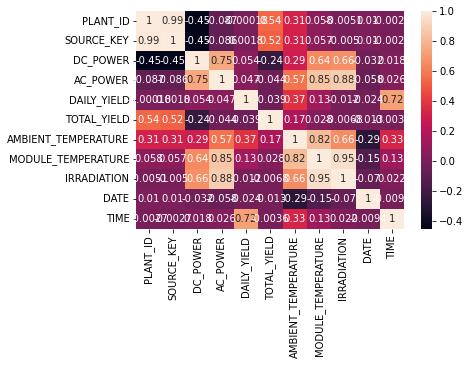

In [217]:
correl = dataset.corr()
sns.heatmap(correl, annot=True)